In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv('4-whp_data.txt', sep='\t')
df.head()

,Time,WHP_psig
0,0:01,342
1,0:02,321
2,0:03,318
3,0:04,306
4,0:05,324


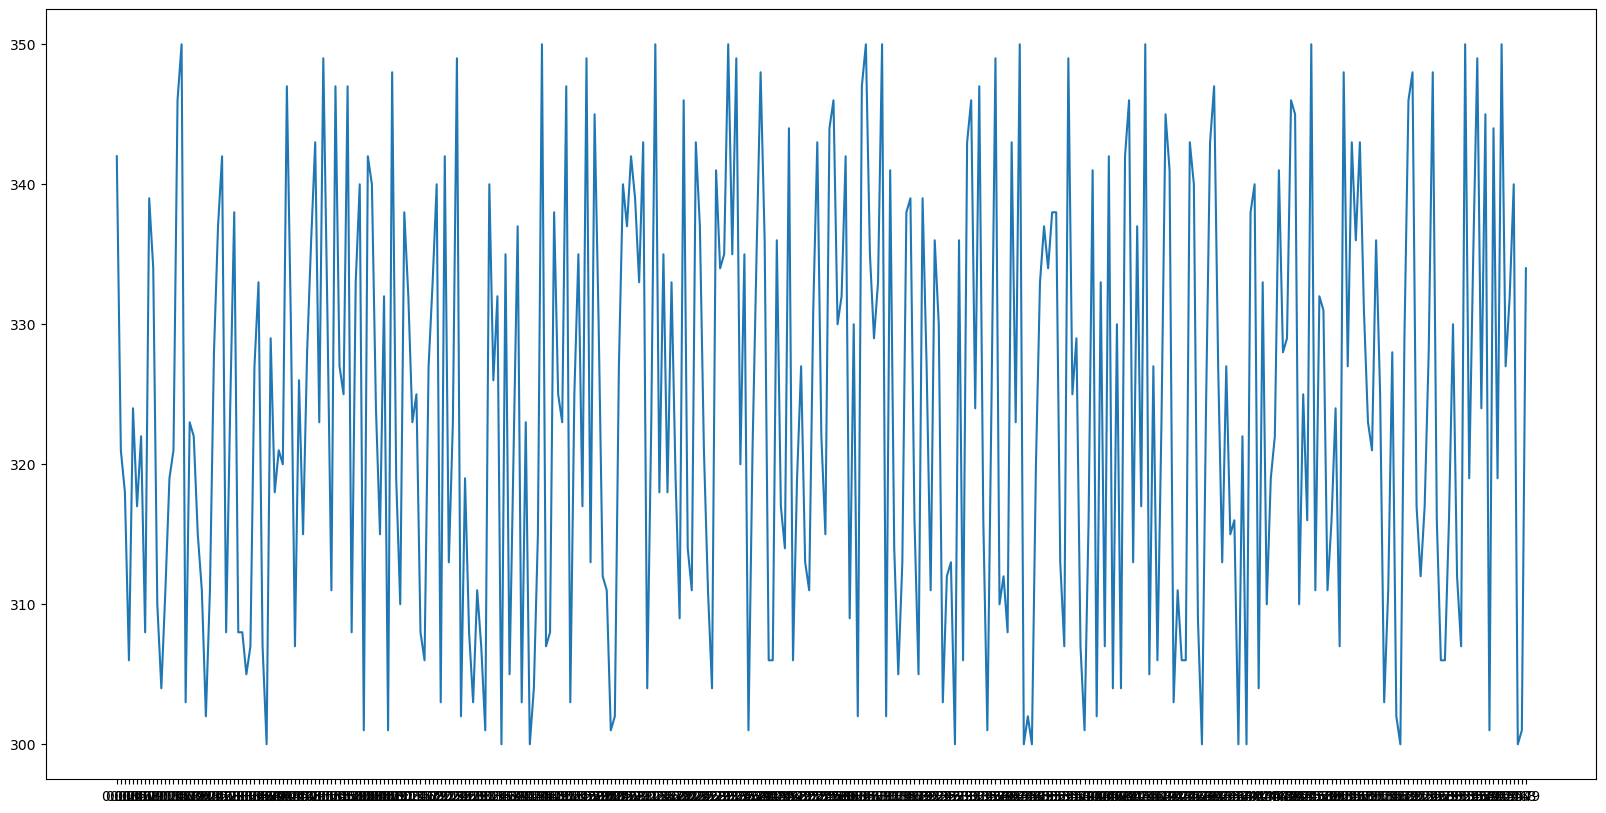

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(df.Time, df.WHP_psig)
plt.show()

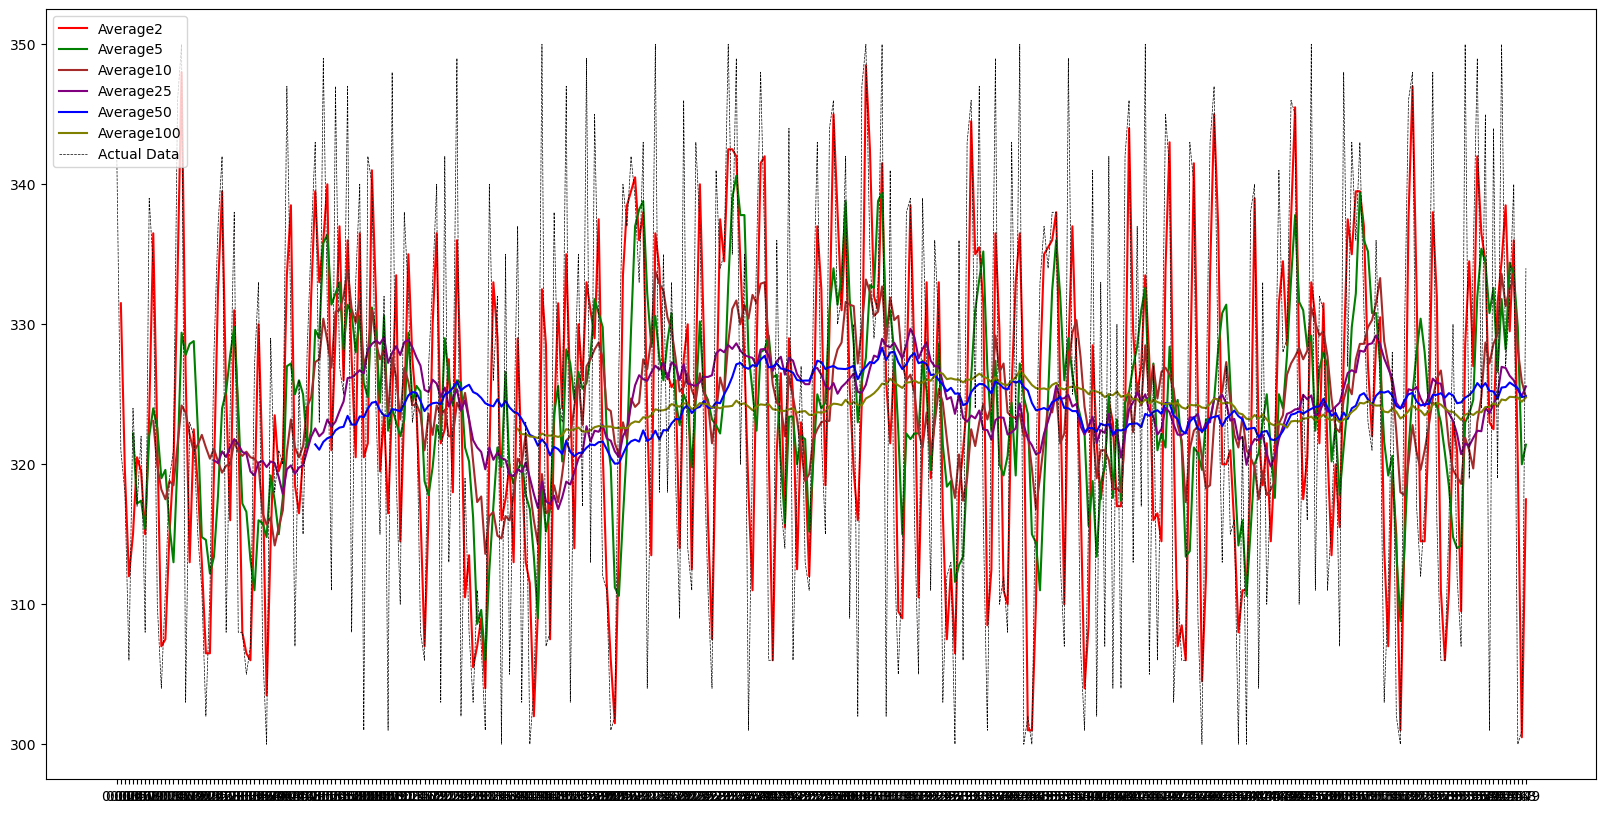

In [42]:
#we now perfome the moving-average method on smoothing the data since the troughs and depths are largely varied

def moving_average(df, window, var):

    df[var] = df["WHP_psig"].rolling(window).mean() #this takes only the average of two adjacent points and moves to the next pair

    return df[var]




window_list = [2, 5, 10, 25, 50, 100]
color = ["red", 'green', 'brown', 'purple', 'blue', 'olive']
plt.figure(figsize=(20,10))
for i in range(0, len(window_list)):
    var = str(window_list[i])
    clr = color[i]
    wind = window_list[i]
    df[var] = moving_average(df, wind, var)
    plt.plot(df["Time"], df[var], label = "Average"+var, color=clr)
    
plt.plot(df["Time"], df["WHP_psig"], label = 'Actual Data', color = 'black', ls = 'dashed', lw = 0.5)
plt.legend(); plt.show()



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              349 non-null    object 
 1   WHP_psig          349 non-null    int64  
 2   whp_moving_avg    348 non-null    float64
 3   whp_moving_avg10  340 non-null    float64
 4   2                 348 non-null    float64
 5   5                 345 non-null    float64
 6   10                340 non-null    float64
 7   25                325 non-null    float64
 8   50                300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.7+ KB
